# Earthquake Prediction

<img src="download.jpg" height=100px width=500px></img>

# Problem Statement:

An earthquake is the shaking of the surface of the Earth resulting from a sudden release of energy in the Earth's lithosphere that creates seismic waves. Here, a trial is made to determine if the earthquake is automatic or reviewed.

## Implementation: 

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
%matplotlib inline

In [19]:
data=pd.read_csv('database.csv')

In [20]:
type(data)

pandas.core.frame.DataFrame

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
Date                          23412 non-null object
Time                          23412 non-null object
Latitude                      23412 non-null float64
Longitude                     23412 non-null float64
Type                          23412 non-null object
Depth                         23412 non-null float64
Depth Error                   4461 non-null float64
Depth Seismic Stations        7097 non-null float64
Magnitude                     23412 non-null float64
Magnitude Type                23409 non-null object
Magnitude Error               327 non-null float64
Magnitude Seismic Stations    2564 non-null float64
Azimuthal Gap                 7299 non-null float64
Horizontal Distance           1604 non-null float64
Horizontal Error              1156 non-null float64
Root Mean Square              17352 non-null float64
ID                            23412 non-null object
Sou

In [22]:
data.describe()

,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square
count,23412.000000,23412.000000,23412.000000,4461.000000,7097.000000,23412.000000,327.000000,2564.000000,7299.000000,1604.000000,1156.000000,17352.000000
mean,1.679033,39.639961,70.767911,4.993115,275.364098,5.882531,0.071820,48.944618,44.163532,3.992660,7.662759,1.022784
std,30.113183,125.511959,122.651898,4.875184,162.141631,0.423066,0.051466,62.943106,32.141486,5.377262,10.430396,0.188545
min,-77.080000,-179.997000,-1.100000,0.000000,0.000000,5.500000,0.000000,0.000000,0.000000,0.004505,0.085000,0.000000
25%,-18.653000,-76.349750,14.522500,1.800000,146.000000,5.600000,0.046000,10.000000,24.100000,0.968750,5.300000,0.900000
50%,-3.568500,103.982000,33.000000,3.500000,255.000000,5.700000,0.059000,28.000000,36.000000,2.319500,6.700000,1.000000
75%,26.190750,145.026250,54.000000,6.300000,384.000000,6.000000,0.075500,66.000000,54.000000,4.724500,8.100000,1.130000
max,86.005000,179.998000,700.000000,91.295000,934.000000,9.100000,0.410000,821.000000,360.000000,37.874000,99.000000,3.440000


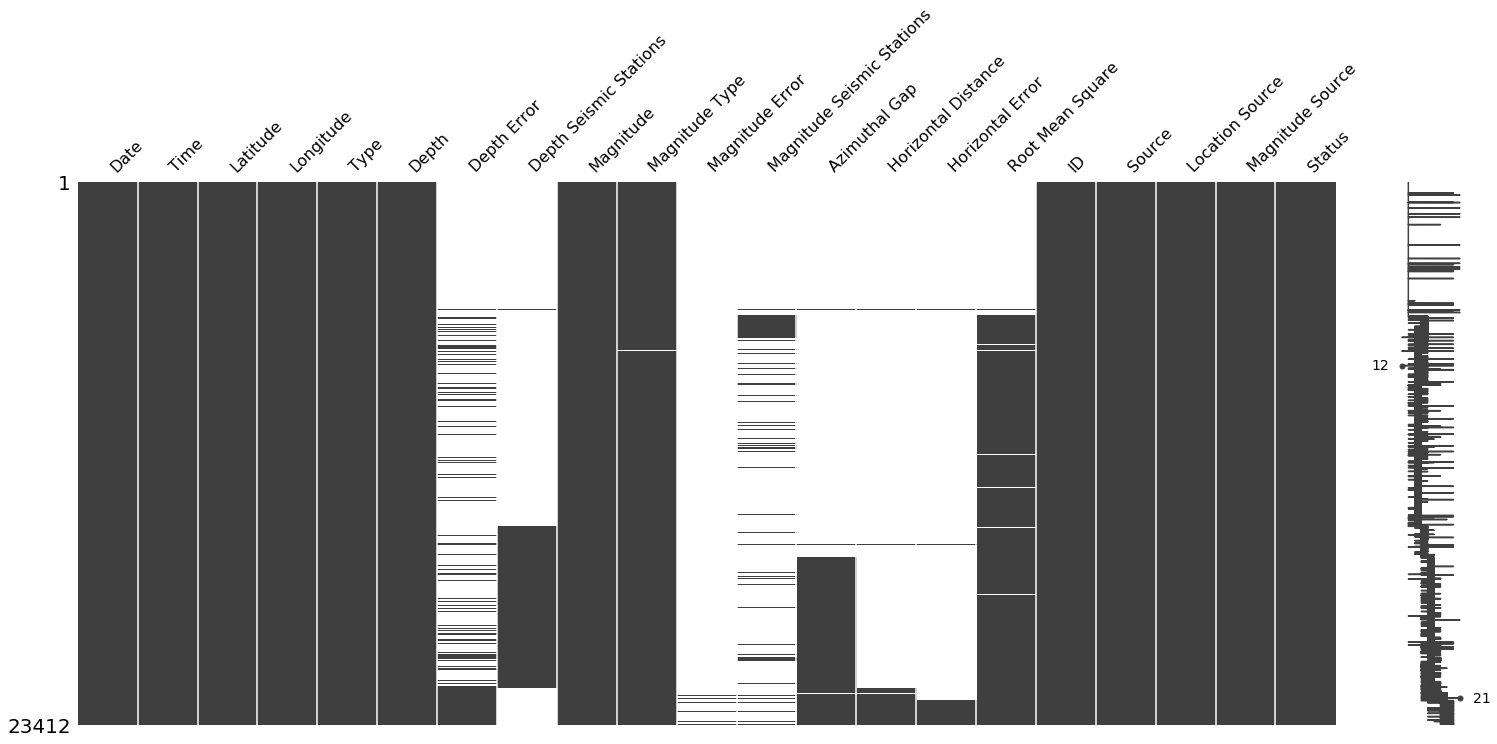

In [23]:
ms.matrix(data)

In [24]:
ndata=data.dropna()
ndata.isnull().sum()

Date                          0
Time                          0
Latitude                      0
Longitude                     0
Type                          0
Depth                         0
Depth Error                   0
Depth Seismic Stations        0
Magnitude                     0
Magnitude Type                0
Magnitude Error               0
Magnitude Seismic Stations    0
Azimuthal Gap                 0
Horizontal Distance           0
Horizontal Error              0
Root Mean Square              0
ID                            0
Source                        0
Location Source               0
Magnitude Source              0
Status                        0
dtype: int64

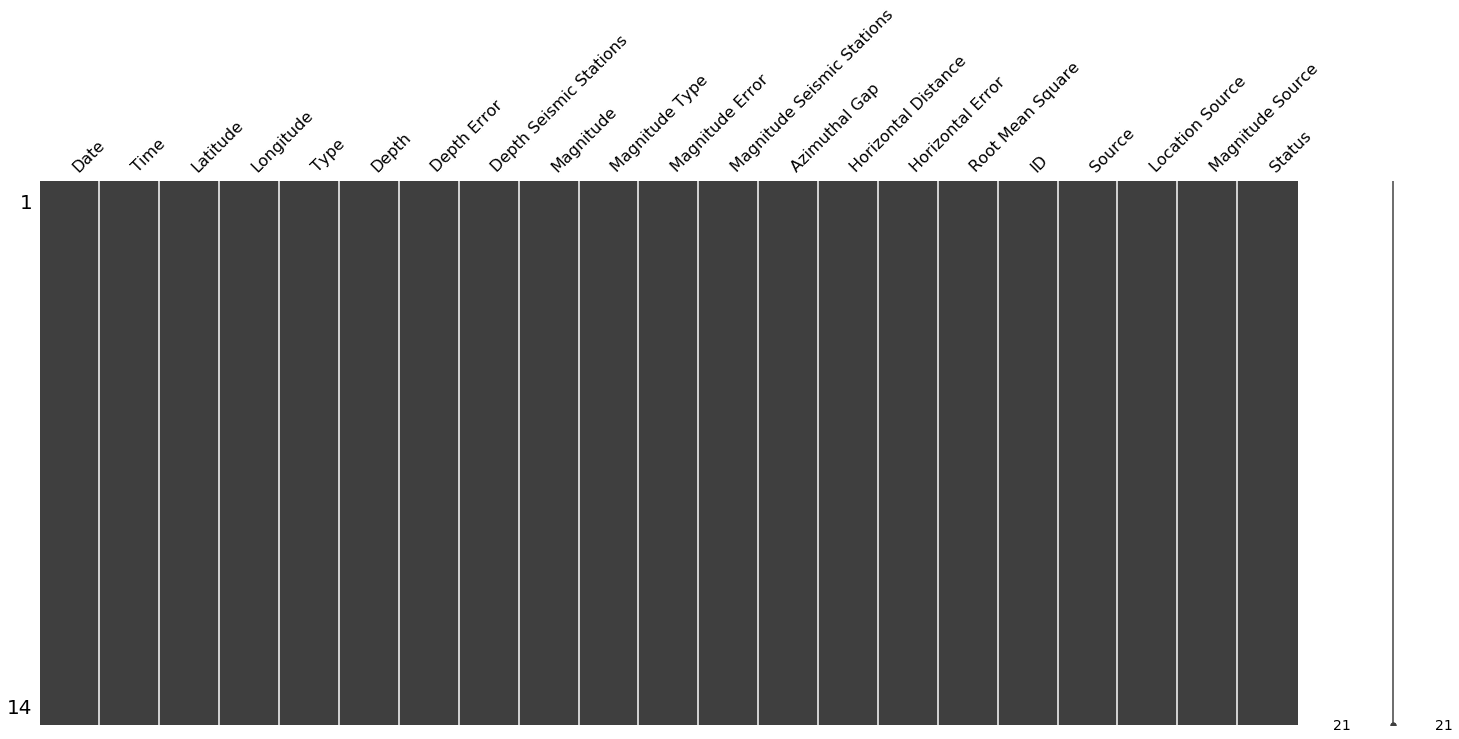

In [25]:
ms.matrix(ndata)

In [54]:
fdata=data[["Latitude","Longitude","Depth","Magnitude"]]

In [55]:
print(fdata)

       Latitude  Longitude   Depth  Magnitude
0       19.2460   145.6160  131.60        6.0
1        1.8630   127.3520   80.00        5.8
2      -20.5790  -173.9720   20.00        6.2
3      -59.0760   -23.5570   15.00        5.8
4       11.9380   126.4270   15.00        5.8
5      -13.4050   166.6290   35.00        6.7
6       27.3570    87.8670   20.00        5.9
7      -13.3090   166.2120   35.00        6.0
8      -56.4520   -27.0430   95.00        6.0
9      -24.5630   178.4870  565.00        5.8
10      -6.8070   108.9880  227.90        5.9
11      -2.6080   125.9520   20.00        8.2
12      54.6360   161.7030   55.00        5.5
13     -18.6970  -177.8640  482.90        5.6
14      37.5230    73.2510   15.00        6.0
15     -51.8400   139.7410   10.00        6.1
16      51.2510   178.7150   30.30        8.7
17      51.6390   175.0550   30.00        6.0
18      52.5280   172.0070   25.00        5.7
19      51.6260   175.7460   25.00        5.8
20      51.0370   177.8480   25.00

In [36]:
odata = data[["Status"]]

In [37]:
print(odata)

          Status
0      Automatic
1      Automatic
2      Automatic
3      Automatic
4      Automatic
5      Automatic
6      Automatic
7      Automatic
8      Automatic
9      Automatic
10     Automatic
11     Automatic
12     Automatic
13     Automatic
14     Automatic
15     Automatic
16     Automatic
17     Automatic
18     Automatic
19     Automatic
20     Automatic
21     Automatic
22     Automatic
23     Automatic
24     Automatic
25     Automatic
26     Automatic
27     Automatic
28     Automatic
29     Automatic
...          ...
23382   Reviewed
23383   Reviewed
23384   Reviewed
23385   Reviewed
23386   Reviewed
23387   Reviewed
23388   Reviewed
23389   Reviewed
23390   Reviewed
23391   Reviewed
23392   Reviewed
23393   Reviewed
23394   Reviewed
23395   Reviewed
23396   Reviewed
23397   Reviewed
23398   Reviewed
23399   Reviewed
23400   Reviewed
23401   Reviewed
23402   Reviewed
23403   Reviewed
23404   Reviewed
23405   Reviewed
23406   Reviewed
23407   Reviewed
23408   Review

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(fdata,odata,test_size=0.30,random_state=101)

In [39]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, Y_train)

C:\Users\Harika Kasimahanthi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [40]:
from sklearn.metrics import confusion_matrix, classification_report
knn_predictions = knn.predict(X_test)  
cm = confusion_matrix(Y_test, knn_predictions) 
print(cm)

[[ 141  668]
 [ 126 6089]]


In [41]:
from sklearn.metrics import accuracy_score 
print ('Accuracy Score :',accuracy_score(Y_test, knn_predictions))

Accuracy Score : 0.8869589977220956


In [42]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(X_train, Y_train) 
gnb_predictions = gnb.predict(X_test) 

C:\Users\Harika Kasimahanthi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [43]:
cm = confusion_matrix(Y_test, gnb_predictions)
print(cm)

[[   7  802]
 [  29 6186]]


In [44]:
accuracy = gnb.score(X_test, Y_test) 
print ('Accuracy score: ',accuracy)

Accuracy score:  0.8816913439635535


In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
logmodel = LogisticRegression()

In [47]:
logmodel.fit(X_train,Y_train)

C:\Users\Harika Kasimahanthi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Harika Kasimahanthi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
predicted =  logmodel.predict(X_test)
predicted

array(['Reviewed', 'Reviewed', 'Reviewed', ..., 'Reviewed', 'Reviewed',
       'Reviewed'], dtype=object)

In [49]:
from sklearn.metrics import confusion_matrix, classification_report

In [50]:
print(confusion_matrix(Y_test, predicted))

[[   0  809]
 [   0 6215]]


In [51]:
from sklearn.metrics import classification_report

print(classification_report(Y_test,predicted))

C:\Users\Harika Kasimahanthi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

   Automatic       0.00      0.00      0.00       809
    Reviewed       0.88      1.00      0.94      6215

    accuracy                           0.88      7024
   macro avg       0.44      0.50      0.47      7024
weighted avg       0.78      0.88      0.83      7024

